In [1]:
#Descrição dos Atributos
#Sample code number|Número de código de amostra: identificador exclusivo.
#Clump thickness|Espessura da moita: as células benignas tendem a ser agrupadas em monocamadas, enquanto as células cancerosas são frequentemente agrupadas em multicamadas.
#Uniformity of cell size/shape|Uniformidade do tamanho / forma das células: As células cancerígenas tendem a variar em tamanho e forma. É por isso que esses parâmetros são valiosos para determinar se as células são cancerígenas ou não.
#Marginal adhesion|Adesão marginal: as células normais tendem a se unir. Células cancerosas tendem a perder essa capacidade. Portanto, a perda de adesão é um sinal de malignidade.
#Single epithelial cell size|Único tamanho de célula epitelial: Está relacionado à uniformidade mencionada acima. As células epiteliais que estão significativamente aumentadas podem ser uma célula maligna.
#Bare nuclei|Núcleos nus: Este é um termo usado para núcleos que não são circundados pelo citoplasma (o resto da célula). Essas são tipicamente vistas em tumores benignos.
#Bland Chromatin|Cromatina suave: Descreve uma "textura" uniforme do núcleo visto em células benignas. Nas células cancerígenas, a cromatina tende a ser mais grosseira.
#Normal nucleoli|Nódulos normais: Nucleoli são pequenas estruturas vistas no núcleo. Em células normais, o nucléolo é geralmente muito pequeno, se visível. Nas células cancerosas, os nucléolos se tornam mais proeminentes e, às vezes, há mais deles.

In [2]:
#Importações dos pacotes necessários
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output

In [3]:
#Importação do dataset
data = pd.read_csv('Breast Cancer Wisconsin (Original) Data Set.csv')

In [4]:
#Visualiza os primeiros elementos do dataset
data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
#Substitui os elementos '2' por 'Benígno' e '4' por 'Malígno' da coluna 'Class'
data['Class'] = data['Class'].apply(lambda classe: classe.replace('2','Benígno'))
data['Class'] = data['Class'].apply(lambda classe: classe.replace('4','Malígno'))

In [6]:
data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,Benígno
1,1002945,5,4,4,5,7,10,3,2,1,Benígno
2,1015425,3,1,1,1,2,2,3,1,1,Benígno
3,1016277,6,8,8,1,3,4,3,7,1,Benígno
4,1017023,4,1,1,3,2,1,3,1,1,Benígno


In [7]:
#Esta linha está igual ao cabeçalho
data[data['Class'] == 'Class']

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
663,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class


In [8]:
#Remove a linha(axis=0) que é igual o cabeçalho. 663 é o índice
data.drop(663,axis=0, inplace=True)

In [9]:
#Remove a coluna Sample code number pois é irrelevante na classificação
data.drop('Sample code number',axis=1,inplace=True)

Benígno: 458 | Malígno: 241


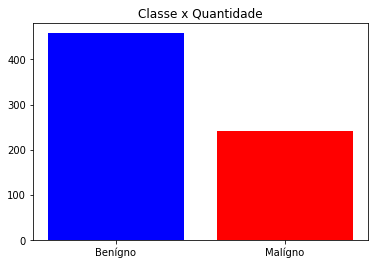

In [10]:
#Quantidade de casos Benígnos e Malígnos
print('Benígno: ' + str(len(data[data['Class'] == 'Benígno'])) + ' | ' + 'Malígno: ' + str(len(data[data['Class'] == 'Malígno'])))
plt.bar(x='Benígno',height=len(data[data['Class'] == 'Benígno']),color='b')
plt.bar(x='Malígno',height=len(data[data['Class'] == 'Malígno']),color='r')
plt.title('Classe x Quantidade')
plt.show()

In [11]:
#Verificando os elementros de cada coluna. Valor da esquerda é o valor na célula e da direita o número de vezes que ele se repete
#Coluna 'Sample code number' não verificada pois é o id de cada diagnóstico

In [12]:
data['Clump Thickness'].value_counts()

1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: Clump Thickness, dtype: int64

In [13]:
data['Uniformity of Cell Size'].value_counts()

1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: Uniformity of Cell Size, dtype: int64

In [14]:
data['Uniformity of Cell Shape'].value_counts()

1     353
2      59
10     58
3      56
4      44
5      34
6      30
7      30
8      28
9       7
Name: Uniformity of Cell Shape, dtype: int64

In [15]:
data['Marginal Adhesion'].value_counts()

1     407
2      58
3      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: Marginal Adhesion, dtype: int64

In [16]:
data['Single Epithelial Cell Size'].value_counts()

2     386
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7      12
9       2
Name: Single Epithelial Cell Size, dtype: int64

In [17]:
data['Bare Nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [18]:
data['Bland Chromatin'].value_counts()

2     166
3     165
1     152
7      73
4      40
5      34
8      28
10     20
9      11
6      10
Name: Bland Chromatin, dtype: int64

In [19]:
data['Normal Nucleoli'].value_counts()

1     443
10     61
3      44
2      36
8      24
6      22
5      19
4      18
9      16
7      16
Name: Normal Nucleoli, dtype: int64

In [20]:
data['Mitoses'].value_counts()

1     579
2      35
3      33
10     14
4      12
7       9
8       8
5       6
6       3
Name: Mitoses, dtype: int64

In [21]:
data['Class'].value_counts()

Benígno    458
Malígno    241
Name: Class, dtype: int64

In [22]:
#Coluna 'Bare Nuclei' possui 16 diagnósticos com valores faltantes que foram preenchidos com '?',as soluções mais simples são
#remover as linhas correspondentes ou fazer a média dos valores e embutir no lugar de '?', Que é o que farei nesse caso
data['Bare Nuclei'][data['Bare Nuclei'] == '?'] = int(round(data['Bare Nuclei'][data['Bare Nuclei'] != '?'].astype('int').mean(),0))

In [23]:
#Ao imprimir resumo aparecem dois '4'
data['Bare Nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
4      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [24]:
#Formatando pra resolver o problema
data['Bare Nuclei'] = data['Bare Nuclei'].astype('int64')
data['Bare Nuclei'].value_counts()

1     402
10    132
4      35
5      30
2      30
3      28
8      21
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [25]:
#Salvando em um arquivo csv sem o index
data.to_csv('B.C.W. (Original) Data Set Clean.csv',index=False)

In [26]:
#Separando os dados em conjuto de treino e validação

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [28]:
#Detalhe no test_size é usado 30% do dataset para teste
df_treino, df_teste = train_test_split(data, test_size = 0.3)
x_treino = df_treino.drop('Class',axis=1)
x_teste = df_teste.drop('Class',axis=1)
y_treino = df_treino['Class']
y_teste = df_teste['Class']

In [29]:
#Árvore de Decisão
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics

In [30]:
#Criando o modelo
modelo = DecisionTreeClassifier()

In [31]:
# Treinando o modelo
modelo.fit(X=x_treino,y=y_treino)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [32]:
# Predisão
predicao = modelo.predict(x_teste)

In [33]:
#Resultado:

#Classificação
results = metrics.classification_report(y_true = y_teste, y_pred = predicao)
print(results)

             precision    recall  f1-score   support

    Benígno       0.96      0.95      0.96       133
    Malígno       0.92      0.94      0.93        77

avg / total       0.95      0.95      0.95       210



In [34]:
#Testando
testeB = pd.Series([3,1,1,1,2,2,3,1,1]) # Benígno índice 2 do dataset
print(modelo.predict(testeB.values.reshape(1,-1)))
testeM = pd.Series([5,3,3,3,2,3,4,4,1]) # Malígno índice 12 do dataset
print(modelo.predict(testeM.values.reshape(1,-1)))

['Benígno']
['Malígno']
